**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bbc_news.csv')
dataset = dataset.dropna(how="any", axis=1)
dataset.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [ ]:
dataset = dataset.rename(columns={'title': 'target', 'description': 'message'})

dataset.head()

,target,pubDate,guid,link,message
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [ ]:

columns = ['target','message']
dataset = pd.DataFrame(dataset, columns=columns)

In [ ]:
dataset.head()

,target,message
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...


In [ ]:
dataset['message_len'] = dataset['message'].apply(lambda x: len(x.split(' ')))
dataset.head()

,target,message,message_len
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,16
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",18
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,17
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,16
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,16


In [ ]:
max(dataset['message_len'])

34

**Exploratory Data**

In [ ]:
balance_counts = dataset.groupby('target')['target'].agg('count').values
balance_counts

array([1, 1, 1, ..., 1, 1, 1])

**Data Pre-processing**

Case Folding

In [ ]:
import re 
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
dataset['message_clean'] = dataset['message'].apply(clean_text)
dataset.head()

,target,message,message_len,message_clean
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,16,the ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",18,"jeremy bowen was on the frontline in irpin, as..."
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,17,one of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,16,the parents of the manchester arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,16,consumers are feeling the impact of higher ene...


Tokenisasi

In [ ]:
def tokenize(message_clean):
    token = nltk.word_tokenize(message_clean)
    return token

In [ ]:

import nltk
nltk.download('punkt')
dataset['tokenized'] = dataset['message_clean'].apply(tokenize)

print('Tokenizing Result : \n') 
print(dataset['tokenized'].head())
print('\n\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenizing Result : 

0    [the, ukrainian, president, says, the, country...
1    [jeremy, bowen, was, on, the, frontline, in, i...
2    [one, of, the, world, 's, biggest, fertiliser,...
3    [the, parents, of, the, manchester, arena, bom...
4    [consumers, are, feeling, the, impact, of, hig...
Name: tokenized, dtype: object






Stopwords

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stop_words(message_clean):
    removed_stop_words = []
    for review in message_clean:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in stop_words])
        )
    return removed_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset['stopwords_removed'] = dataset['tokenized'].apply(remove_stop_words)

print('Stopwords Result : \n') 
print(dataset['stopwords_removed'].head())
print('\n\n\n')

Stopwords Result : 

0    [, ukrainian, president, says, , country, , , ...
1    [jeremy, bowen, , , , frontline, , irpin, ,, ,...
2    [one, , , world, 's, biggest, fertiliser, firm...
3    [, parents, , , manchester, arena, bombing, 's...
4    [consumers, , feeling, , impact, , higher, ene...
Name: stopwords_removed, dtype: object






Stemming

In [ ]:
dataset['stemming_removed'] = dataset['stopwords_removed'].apply(remove_stop_words)

print('Stemming Result : \n') 
print(dataset['stopwords_removed'].head())
print('\n\n\n')

Stemming Result : 

0    [, ukrainian, president, says, , country, , , ...
1    [jeremy, bowen, , , , frontline, , irpin, ,, ,...
2    [one, , , world, 's, biggest, fertiliser, firm...
3    [, parents, , , manchester, arena, bombing, 's...
4    [consumers, , feeling, , impact, , higher, ene...
Name: stopwords_removed, dtype: object






Clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Clustering by the target

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(dataset.message_clean)
text1 = tfidf.transform(dataset.message_clean)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning: init_size=10 should be larger than n_clusters=12. Setting it to min(3*n_clusters, n_samples)
  self._check_params(X)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning: init_size=10 should be larger than n_clusters=14. Setting it to min(3*n_clusters, n_samples)
  self._check_params(X)


Fit 12 clusters
Fit 14 clusters
Fit 16 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning: init_size=10 should be larger than n_clusters=16. Setting it to min(3*n_clusters, n_samples)
  self._check_params(X)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning: init_size=10 should be larger than n_clusters=18. Setting it to min(3*n_clusters, n_samples)
  self._check_params(X)


Fit 18 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning: init_size=10 should be larger than n_clusters=20. Setting it to min(3*n_clusters, n_samples)
  self._check_params(X)


Fit 20 clusters


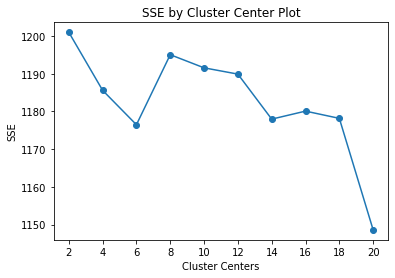

In [ ]:
import matplotlib.pyplot as plt
def find_optimal_clusters(dataset, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=10, batch_size=30, random_state=20).fit(dataset).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text1, 20)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=16, init_size=10, batch_size=30, random_state=20).fit_predict(text1)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1902: RuntimeWarning: init_size=10 should be larger than n_clusters=16. Setting it to min(3*n_clusters, n_samples)
  self._check_params(X)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


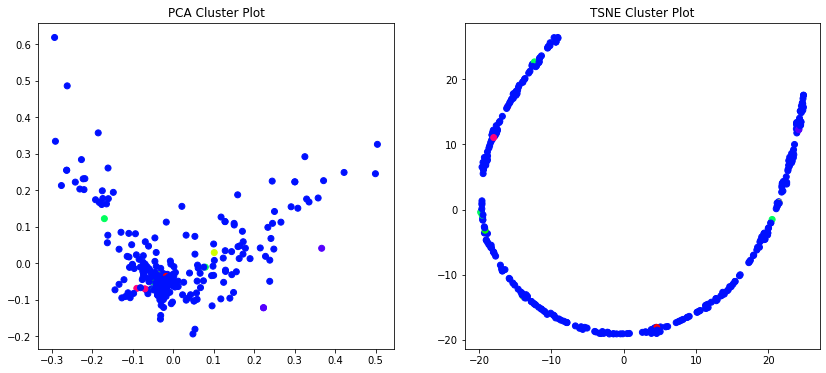

In [ ]:
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA

def plot_tsne_pca(dataset, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(dataset.shape[0]), size=500, replace=False)
    
    pca = PCA(n_components=2).fit_transform(dataset[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=1).fit_transform(dataset[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text1, clusters)

In [ ]:
def get_top_keywords(dataset, clusters, labels, n_terms):
    df3 = pd.DataFrame(dataset.todense()).groupby(clusters).mean()
    
    for i,r in df3.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text1, clusters, tfidf.get_feature_names(), 10)


Cluster 0
game,gas,global,goals,going,future,zaghari,workers,union,join

Cluster 1
gas,global,goals,going,future,zaghari,says,leader,ex,wife

Cluster 2
global,goals,going,gold,gas,ukraine,military,work,turn,surging

Cluster 3
friday,fuel,future,russia,rising,boss,papers,stories,firm,ferry

Cluster 4
used,attacks,years,new,answers,turn,past,high,event,schools

Cluster 5
friday,french,government,work,wants,pay,money,match,future,does

Cluster 6
says,putin,calls,comes,mps,uk,refugee,meet,johnson,boris

Cluster 7
beat,match,fans,breaking,record,league,champions,real,madrid,barcelona

Cluster 8
got,friday,french,free,frank,france,fourth,countries,violence,record

Cluster 9
gas,global,goals,going,fuel,world,year,old,speech,daughter

Cluster 10
bbc,world,people,uk,england,war,russian,russia,says,ukraine

Cluster 11
faces,russia,russian,forces,areas,advances,ukrainian,ongoing,mariupol,fighting

Cluster 12
free,france,fa,says,league,manager,winning,premier,frank,struggling

Cluster 13
global,g

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


vectorization

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dataset['target'])

dataset['target_encoded'] = le.transform(dataset['target'])
dataset.head()

,target,message,message_len,message_clean,tokenized,stopwords_removed,stemming_removed,target_encoded
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,16,the ukrainian president says the country will ...,"[the, ukrainian, president, says, the, country...","[, ukrainian, president, says, , country, , , ...","[, ukrainian, president, says, , country, , , ...",976
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",18,"jeremy bowen was on the frontline in irpin, as...","[jeremy, bowen, was, on, the, frontline, in, i...","[jeremy, bowen, , , , frontline, , irpin, ,, ,...","[jeremy, bowen, , , , frontline, , irpin, ,, ,...",1063
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,17,one of the world's biggest fertiliser firms sa...,"[one, of, the, world, 's, biggest, fertiliser,...","[one, , , world, 's, biggest, fertiliser, firm...","[one, , , world, 's, biggest, fertiliser, firm...",875
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,16,the parents of the manchester arena bombing's ...,"[the, parents, of, the, manchester, arena, bom...","[, parents, , , manchester, arena, bombing, 's...","[, parents, , , manchester, arena, bombing, 's...",480
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,16,consumers are feeling the impact of higher ene...,"[consumers, are, feeling, the, impact, of, hig...","[consumers, , feeling, , impact, , higher, ene...","[consumers, , feeling, , impact, , higher, ene...",845


In [ ]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = dataset['message_clean']
y = dataset['target_encoded']

print(len(x), len(y))

1234 1234


In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

925 925
309 309


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [ ]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

Word Embeding : GlOVE

In [ ]:
texts = dataset['message_clean']
target = dataset['target_encoded']

In [ ]:
# Calculate the length of our vocabulary
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

4997

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-06-15 02:03:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-06-15 02:03:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-06-15 02:03:57--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/content/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [ ]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42794999, -0.17565   , -0.52432001, ...,  0.66737998,
         0.24405   ,  0.12504999],
       [ 0.39230999, -0.21544001,  0.10567   , ...,  0.043646  ,
         0.093244  , -0.47871   ]])

TF-IDF

In [ ]:
def calc_TF(message_clean):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in message_clean:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(target)
    return TF_dict

dataset["embeddings_dictionary"] = dataset['stemming_removed'].apply(calc_TF)

dataset["embeddings_dictionary"].head()

0    {'': 0.006482982171799027, 'ukrainian': 0.0008...
1    {'jeremy': 0.0008103727714748784, 'bowen': 0.0...
2    {'one': 0.0008103727714748784, '': 0.004051863...
3    {'': 0.004862236628849271, 'parents': 0.000810...
4    {'consumers': 0.0008103727714748784, '': 0.004...
Name: embeddings_dictionary, dtype: object

In [ ]:
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in dataset["embeddings_dictionary"][index]:
    print('%20s' % key, "\t", dataset["embeddings_dictionary"][index][key])

                term 	 TF

               three 	 0.0008103727714748784
                crew 	 0.0008103727714748784
                     	 0.008103727714748784
               flown 	 0.0008103727714748784
            hospital 	 0.0008103727714748784
               found 	 0.0008103727714748784
                keel 	 0.0008103727714748784
                boat 	 0.0008103727714748784
              sailed 	 0.0008103727714748784
           peterhead 	 0.0008103727714748784
                   . 	 0.0008103727714748784


In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(dataset["embeddings_dictionary"])
DF

{'': 1232,
 'ukrainian': 57,
 'president': 31,
 'says': 125,
 'country': 35,
 'forgive': 1,
 'forget': 2,
 'murder': 4,
 'civilians': 16,
 '.': 1184,
 'jeremy': 3,
 'bowen': 3,
 'frontline': 3,
 'irpin': 5,
 ',': 404,
 'residents': 12,
 'came': 4,
 'russian': 97,
 'fire': 7,
 'trying': 11,
 'flee': 3,
 'one': 45,
 'world': 67,
 "'s": 299,
 'biggest': 10,
 'fertiliser': 1,
 'firms': 7,
 'conflict': 9,
 'could': 34,
 'deliver': 1,
 'shock': 8,
 'food': 10,
 'supplies': 8,
 'parents': 10,
 'manchester': 22,
 'arena': 1,
 'bombing': 6,
 'youngest': 3,
 'victim': 5,
 'speak': 8,
 'life': 14,
 'since': 34,
 'died': 16,
 'consumers': 2,
 'feeling': 3,
 'impact': 7,
 'higher': 6,
 'energy': 17,
 'costs': 8,
 'fuel': 9,
 'prices': 18,
 'household': 4,
 'bills': 13,
 'jump': 2,
 'boris': 16,
 'johnson': 15,
 'meet': 6,
 'canadian': 3,
 'dutch': 3,
 'pms': 4,
 'mps': 6,
 'debate': 2,
 'new': 37,
 'laws': 2,
 'targeting': 5,
 'oligarchs': 2,
 'home': 24,
 'secretary': 5,
 '``': 113,
 'surging': 5,

In [ ]:
import numpy as np
n_document = len(dataset)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
dataset["TF-IDF_dict"] = dataset["embeddings_dictionary"].apply(calc_TF_IDF)

In [ ]:
# Check TF-IDF result
index = 1

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in dataset["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", dataset["embeddings_dictionary"][index][key] ,"\t" , dataset["TF-IDF_dict"][index][key])
    
TF_IDF = pd.DataFrame(dataset, columns=['term', 'rank'])

                term 	         TF 	              TF-IDF

              jeremy 	 0.0008103727714748784 	 0.004644831315514945
               bowen 	 0.0008103727714748784 	 0.004644831315514945
                     	 0.006482982171799027 	 5.255762080965065e-06
           frontline 	 0.0008103727714748784 	 0.004644831315514945
               irpin 	 0.0008103727714748784 	 0.004316253432120971
                   , 	 0.0008103727714748784 	 0.0009028599168223614
           residents 	 0.0008103727714748784 	 0.0036896813995168525
                came 	 0.0008103727714748784 	 0.004464001857399702
             russian 	 0.0008103727714748784 	 0.00205271371620321
                fire 	 0.0008103727714748784 	 0.004083123713764584
              trying 	 0.0008103727714748784 	 0.0037545458303706097
                flee 	 0.0008103727714748784 	 0.004644831315514945
                   . 	 0.0008103727714748784 	 3.2834806236711207e-05


In [ ]:
#calc TF-IDF-Group
def calc_TF_IDF_Group(TF_IDF):
    TF_IDF_Dict_Group = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF_IDF:
        TF_IDF_Dict_Group [key] = TF_IDF[key]  *clusters
    return TF_IDF_Dict_Group 

#Stores the TF-IDF Series
dataset["TF_IDF_Dict_Group"] = dataset["embeddings_dictionary"].apply(calc_TF_IDF_Group)

In [ ]:
# Check TF-IDF-Group result
index = 1

print('%20s' % "term", "\t", '%10s' % "TF-IDF", "\t", '%20s' % "TF-IDF-Group\n")
for key in dataset["TF_IDF_Dict_Group"][index]:
    print('%20s' % key, "\t", dataset["embeddings_dictionary"][index][key] ,"\t" , dataset["TF_IDF_Dict_Group"][index][key])
    
TF_IDF = pd.DataFrame(dataset, columns=['term', 'rank'])

                term 	     TF-IDF 	        TF-IDF-Group

              jeremy 	 0.0008103727714748784 	 [0.00810373 0.00810373 0.00810373 ... 0.00810373 0.00810373 0.00810373]
               bowen 	 0.0008103727714748784 	 [0.00810373 0.00810373 0.00810373 ... 0.00810373 0.00810373 0.00810373]
                     	 0.006482982171799027 	 [0.06482982 0.06482982 0.06482982 ... 0.06482982 0.06482982 0.06482982]
           frontline 	 0.0008103727714748784 	 [0.00810373 0.00810373 0.00810373 ... 0.00810373 0.00810373 0.00810373]
               irpin 	 0.0008103727714748784 	 [0.00810373 0.00810373 0.00810373 ... 0.00810373 0.00810373 0.00810373]
                   , 	 0.0008103727714748784 	 [0.00810373 0.00810373 0.00810373 ... 0.00810373 0.00810373 0.00810373]
           residents 	 0.0008103727714748784 	 [0.00810373 0.00810373 0.00810373 ... 0.00810373 0.00810373 0.00810373]
                came 	 0.0008103727714748784 	 [0.00810373 0.00810373 0.00810373 ... 0.00810373 0.00810373 0.00

In [ ]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

dataset["TF_IDF_Vec"] = dataset["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(dataset["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(dataset["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[5.255762080965065e-06, 3.2834806236711207e-05, 0.0, 0.0, 0.0, 0.0018490553464455876, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0024777740631433663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0028642603452262746, 0.0, 0.0, 0.0, 0.0029597085102638625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [ ]:
# Convert Series to List
TF_IDF_Vec_List = np.array(dataset["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
2,",",0.468584
3,'s,0.393097
4,ukraine,0.265717
5,says,0.234830
6,``,0.231619
7,'',0.231619
8,russia,0.210479
9,russian,0.201166
10,-,0.191553
12,england,0.168746


Cosine Simlarity

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

#define arrays
texts = np.random.randint(10, size=100)
target = np.random.randint(10, size=100)

#calculate Cosine Similarity
cos_sim = dot(texts, target)/(norm(texts)*norm(target))

cos_sim



0.7749404309147243

Example

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

#define arrays
dataset.stemming_removed[1] = np.random.randint(10, size=100)
dataset.stemming_removed[2] = np.random.randint(10, size=100)

#calculate Cosine Similarity
cos_sim = dot(dataset.stemming_removed[1], dataset.stemming_removed[2])/(norm(dataset.stemming_removed[1])*norm(dataset.stemming_removed[2]))

cos_sim



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.7775869999009756

Evaluation

In [ ]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [ ]:
# Make class anf probability predictions
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [ ]:
# calculate accuracy of class predictions
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))


0.05825242718446602
